In [19]:
### Training logistic Regression on the training set with SEVERITY_CLASS as the target variable
### steps followed:
# training the model
# using CV-HPT 
# trying cv-hpt best model on holdout set

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from utils import utils

In [2]:
df=pd.read_csv('final_ohc_wto_sde_train.csv')
df

,ev_id,damage,cert_max_gr_wt,afm_hrs_last_insp,apt_elev,sky_nonceil_ht,sky_ceil_ht,vis_sm,wx_temp,wind_vel_kts,...,med_certf_BASC,med_certf_CL1,med_certf_CL2,med_certf_CL3,med_certf_SPRT,med_crtf_vldty_WOWL,med_crtf_vldty_WTLS,med_crtf_vldty_WWL,crew_tox_perf_N,crew_tox_perf_Y
0,20080506X00599,1,0.012294,0.005339,0.086957,0.00,0.000000,0.25,0.324324,0.225806,...,0,0,0,1,0,0,0,1,1,0
1,20090701X43709,1,0.016400,0.005339,0.086957,0.00,0.000000,0.25,0.783784,0.129032,...,0,1,0,0,0,1,0,0,1,0
2,20080827X01344,2,0.014951,0.005339,0.086957,0.00,0.000000,0.25,0.783784,0.225806,...,0,0,1,0,0,1,0,0,0,1
3,20090811X65603,1,0.021714,0.005339,0.142068,0.03,0.000000,0.25,0.783784,0.258065,...,0,0,1,0,0,1,0,0,1,0
4,20090608X30506,1,0.013502,0.005339,0.086957,0.00,0.000000,0.25,0.783784,0.193548,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12426,20120710X40020,1,0.014951,0.005339,0.095238,0.00,0.233333,0.25,0.783784,0.161290,...,0,0,0,1,0,0,0,1,1,0
12427,20210414102909,1,0.012294,0.005339,0.099576,0.00,0.000000,0.25,0.810811,0.193548,...,0,0,0,1,0,0,0,1,1,0
12428,20120823X95947,1,0.007512,0.002482,0.135266,0.00,0.000000,0.25,0.783784,0.000000,...,0,0,0,1,0,0,0,1,1,0
12429,20080902X01358,1,0.025096,0.005339,0.086957,0.00,0.000000,0.25,0.783784,0.225806,...,0,0,1,0,0,1,0,0,1,0


In [3]:
target_column='severity_class'
x_train, x_test, y_train, y_test=utils.dataset_traintest_split(df, target_column)

In [4]:
x_train = x_train.drop(columns=['ev_id','damage','ev_highest_injury'], errors='ignore') 
x_test = x_test.drop(columns=['ev_id','damage','ev_highest_injury'], errors='ignore')

In [5]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(class_weight='balanced',solver='liblinear')

In [6]:
model1.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [7]:
from sklearn.metrics import accuracy_score,recall_score, f1_score, precision_score, balanced_accuracy_score
y_pred = model1.predict(x_test)

a, b, c, d, e = utils.print_metrics(y_test,y_pred)

Accuracy: 0.54
Balanced Accuracy: 0.21
Precision: 0.61
Recall: 0.54
F1 Score: 0.56


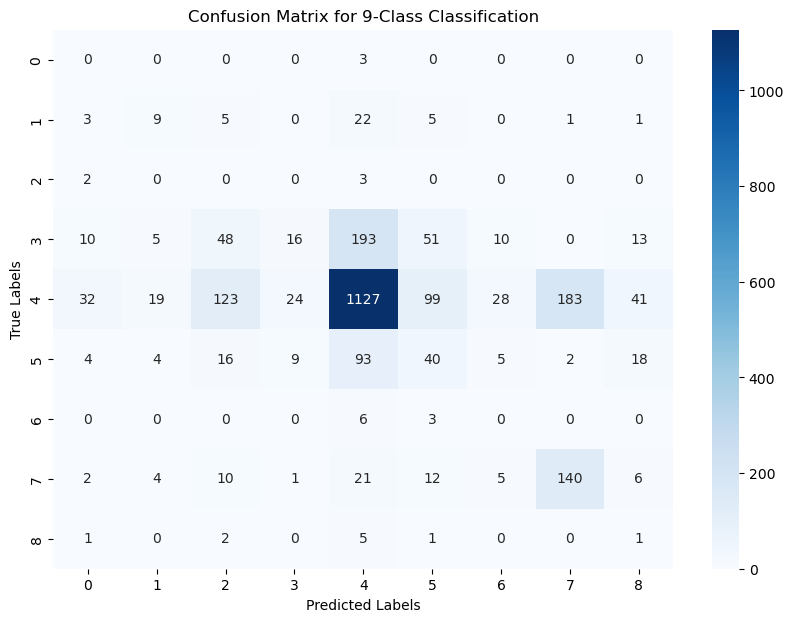

None


In [8]:
cm=utils.plot_confusion_matrix(y_test,y_pred)
print(cm)

In [9]:
x = df.drop(columns=['severity_class','ev_id','damage','ev_highest_injury'])
y = df[['severity_class']]
k = 5
fold_size = len(x) // k
for i in range(k):
    x_test2 = x.iloc[i * fold_size : (i + 1) * fold_size]
    y_test2= y.iloc[i * fold_size : (i + 1) * fold_size]
    x_train2 = pd.concat([x.iloc[:i * fold_size], x.iloc[(i + 1) * fold_size:]])
    y_train2 = pd.concat([y.iloc[:i * fold_size], y.iloc[(i + 1) * fold_size:]])

In [10]:
from sklearn.model_selection import KFold, GridSearchCV

cv = KFold(n_splits = 5, shuffle=False)  
logReg = LogisticRegression() 
params = {
    'penalty':['l1','l2'],
    'solver': ['liblinear'],
    'C': [0.1, 1, 10, 100],
}

grid_search1 = GridSearchCV(
    estimator=logReg,       
    param_grid=params,      
    scoring = 'balanced_accuracy',
    cv=cv,
    verbose=2,              
    n_jobs=4,              
)

grid_search1.fit(x_train2, y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\Tanushree\miniconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='balanced_accuracy', verbose=2)

In [11]:
best_params = grid_search1.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [12]:
logReg = LogisticRegression(
    penalty='l1',       
    solver='liblinear', 
    C = 10,            
)

logReg.fit(x_train2, y_train2)
y1_pred2 = logReg.predict(x_test2)

balance = balanced_accuracy_score(y_test2, y1_pred2)
print(balance*100)

C:\Users\Tanushree\miniconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


13.619416758951644


In [13]:
a, b, c, d, e = utils.print_metrics(y_test2, y1_pred2)

Accuracy: 0.69
Balanced Accuracy: 0.14
Precision: 0.52
Recall: 0.69
F1 Score: 0.58


C:\Users\Tanushree\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
dh=pd.read_csv('final_ohc_wto_sde_holdout.csv')
dh

,ev_id,damage,cert_max_gr_wt,afm_hrs_last_insp,apt_elev,sky_nonceil_ht,sky_ceil_ht,vis_sm,wx_temp,wind_vel_kts,...,med_certf_BASC,med_certf_CL1,med_certf_CL2,med_certf_CL3,med_certf_SPRT,med_crtf_vldty_WOWL,med_crtf_vldty_WTLS,med_crtf_vldty_WWL,crew_tox_perf_N,crew_tox_perf_Y
0,20200819X80407,1,0.007710,0.005339,0.039732,0.000000,0.000000,0.25,0.783784,0.225806,...,0,0,0,1,0,1,0,0,1,0
1,20170704X12341,1,0.018236,0.005339,0.411220,0.400000,0.000000,0.25,0.783784,0.322581,...,0,1,0,0,0,0,0,1,1,0
2,20141107X32003,1,0.014458,0.005339,0.089816,0.000000,0.000000,0.25,0.783784,0.290323,...,0,1,0,0,0,0,0,1,1,0
3,20090202X02717,1,0.012294,0.005339,0.093661,0.000000,0.333333,0.25,0.810811,0.290323,...,0,0,0,1,0,1,0,0,1,0
4,20100806X95014,1,0.015434,0.000161,0.086957,0.000000,0.000000,0.25,0.783784,0.225806,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,20220822105779,1,0.007705,0.005339,0.086957,0.040000,0.056667,0.25,0.783784,0.161290,...,0,1,0,0,0,1,0,0,1,0
3104,20130711X70752,1,0.012294,0.005339,0.027605,0.083333,0.000000,0.25,0.783784,0.387097,...,0,0,1,0,0,1,0,0,1,0
3105,20201026102189,1,0.060355,0.001768,0.086957,0.000000,0.000000,0.25,0.783784,0.225806,...,1,0,0,0,0,1,0,0,1,0
3106,20160621X92619,1,0.011811,0.004447,0.517993,0.000000,0.000000,0.25,0.783784,0.096774,...,0,0,0,1,0,0,0,1,1,0


In [15]:
x_h = dh.drop(columns=["severity_class","ev_id", 'damage','ev_highest_injury']) 
y_h = dh["severity_class"]

In [16]:
y_h_pred = logReg.predict(x_h)

In [17]:
a, b, c, d, e = utils.print_metrics(y_h, y_h_pred)

Accuracy: 0.67
Balanced Accuracy: 0.14
Precision: 0.51
Recall: 0.67
F1 Score: 0.56


C:\Users\Tanushree\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
### Training logistic Regression on the training set with DAMAGE as the target variable
### steps followed:
# training the model
# using CV-HPT 
# trying cv-hpt best model on holdout set

In [21]:
df=pd.read_csv('final_ohc_wto_sde_train.csv')
df

,ev_id,damage,cert_max_gr_wt,afm_hrs_last_insp,apt_elev,sky_nonceil_ht,sky_ceil_ht,vis_sm,wx_temp,wind_vel_kts,...,med_certf_BASC,med_certf_CL1,med_certf_CL2,med_certf_CL3,med_certf_SPRT,med_crtf_vldty_WOWL,med_crtf_vldty_WTLS,med_crtf_vldty_WWL,crew_tox_perf_N,crew_tox_perf_Y
0,20080506X00599,1,0.012294,0.005339,0.086957,0.00,0.000000,0.25,0.324324,0.225806,...,0,0,0,1,0,0,0,1,1,0
1,20090701X43709,1,0.016400,0.005339,0.086957,0.00,0.000000,0.25,0.783784,0.129032,...,0,1,0,0,0,1,0,0,1,0
2,20080827X01344,2,0.014951,0.005339,0.086957,0.00,0.000000,0.25,0.783784,0.225806,...,0,0,1,0,0,1,0,0,0,1
3,20090811X65603,1,0.021714,0.005339,0.142068,0.03,0.000000,0.25,0.783784,0.258065,...,0,0,1,0,0,1,0,0,1,0
4,20090608X30506,1,0.013502,0.005339,0.086957,0.00,0.000000,0.25,0.783784,0.193548,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12426,20120710X40020,1,0.014951,0.005339,0.095238,0.00,0.233333,0.25,0.783784,0.161290,...,0,0,0,1,0,0,0,1,1,0
12427,20210414102909,1,0.012294,0.005339,0.099576,0.00,0.000000,0.25,0.810811,0.193548,...,0,0,0,1,0,0,0,1,1,0
12428,20120823X95947,1,0.007512,0.002482,0.135266,0.00,0.000000,0.25,0.783784,0.000000,...,0,0,0,1,0,0,0,1,1,0
12429,20080902X01358,1,0.025096,0.005339,0.086957,0.00,0.000000,0.25,0.783784,0.225806,...,0,0,1,0,0,1,0,0,1,0


In [22]:
target_column = 'damage'
x_test, x_train, y_test, y_train = utils.dataset_traintest_split(df, target_column)

In [24]:
x_test = x_test.drop(columns=['ev_id','severity_class','ev_highest_injury'],errors='ignore')
x_train = x_train.drop(columns=['ev_id','severity_class','ev_highest_injury'],errors='ignore')

In [25]:
model2 = LogisticRegression(class_weight='balanced', solver='liblinear')

In [26]:
model2.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [27]:
y_pred2 = model2.predict(x_test)

In [28]:
a,b,c,d,e = utils.print_metrics(y_test,y_pred2)

Accuracy: 0.87
Balanced Accuracy: 0.57
Precision: 0.89
Recall: 0.87
F1 Score: 0.88


In [31]:
x = df.drop(columns=['severity_class','ev_id','damage','ev_highest_injury'])
y = df[['damage']]
k = 5
fold_size = len(x) // k
for i in range(k):
    x_test2 = x.iloc[i * fold_size : (i + 1) * fold_size]
    y_test2= y.iloc[i * fold_size : (i + 1) * fold_size]
    x_train2 = pd.concat([x.iloc[:i * fold_size], x.iloc[(i + 1) * fold_size:]])
    y_train2 = pd.concat([y.iloc[:i * fold_size], y.iloc[(i + 1) * fold_size:]])

In [32]:
cv = KFold(n_splits = 5, shuffle=False)  
logReg = LogisticRegression() 
params = {
    'penalty':['l1','l2'],
    'solver': ['liblinear'],
    'C': [0.1, 1, 10, 100],
}

grid_search1 = GridSearchCV(
    estimator=logReg,       
    param_grid=params,      
    scoring = 'balanced_accuracy',
    cv=cv,
    verbose=2,              
    n_jobs=4,              
)

grid_search1.fit(x_train2, y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\Tanushree\miniconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='balanced_accuracy', verbose=2)

In [33]:
best_params = grid_search1.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [34]:
logReg = LogisticRegression(
    penalty='l2',       
    solver='liblinear', 
    C = 10,            
)

logReg.fit(x_train2, y_train2)
y1_pred2 = logReg.predict(x_test2)

balance = balanced_accuracy_score(y_test2, y1_pred2)
print(balance*100)

C:\Users\Tanushree\miniconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


41.52469119239999


In [35]:
a, b, c, d, e = utils.print_metrics(y_test2, y1_pred2)

Accuracy: 0.90
Balanced Accuracy: 0.42
Precision: 0.88
Recall: 0.90
F1 Score: 0.88


In [36]:
x_h = dh.drop(columns=["severity_class","ev_id", 'damage','ev_highest_injury']) 
y_h = dh["damage"]

In [37]:
y_h_pred = logReg.predict(x_h)

In [38]:
a, b, c, d, e = utils.print_metrics(y_h, y_h_pred)

Accuracy: 0.89
Balanced Accuracy: 0.40
Precision: 0.85
Recall: 0.89
F1 Score: 0.86


In [39]:
### Training logistic Regression on the training set with EV_HIGHEST_INJURY as the target variable
### steps followed:
# training the model
# using CV-HPT 
# trying cv-hpt best model on holdout set

In [40]:
df=pd.read_csv("final_ohc_wto_sde_train.csv")
df

,ev_id,damage,cert_max_gr_wt,afm_hrs_last_insp,apt_elev,sky_nonceil_ht,sky_ceil_ht,vis_sm,wx_temp,wind_vel_kts,...,med_certf_BASC,med_certf_CL1,med_certf_CL2,med_certf_CL3,med_certf_SPRT,med_crtf_vldty_WOWL,med_crtf_vldty_WTLS,med_crtf_vldty_WWL,crew_tox_perf_N,crew_tox_perf_Y
0,20080506X00599,1,0.012294,0.005339,0.086957,0.00,0.000000,0.25,0.324324,0.225806,...,0,0,0,1,0,0,0,1,1,0
1,20090701X43709,1,0.016400,0.005339,0.086957,0.00,0.000000,0.25,0.783784,0.129032,...,0,1,0,0,0,1,0,0,1,0
2,20080827X01344,2,0.014951,0.005339,0.086957,0.00,0.000000,0.25,0.783784,0.225806,...,0,0,1,0,0,1,0,0,0,1
3,20090811X65603,1,0.021714,0.005339,0.142068,0.03,0.000000,0.25,0.783784,0.258065,...,0,0,1,0,0,1,0,0,1,0
4,20090608X30506,1,0.013502,0.005339,0.086957,0.00,0.000000,0.25,0.783784,0.193548,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12426,20120710X40020,1,0.014951,0.005339,0.095238,0.00,0.233333,0.25,0.783784,0.161290,...,0,0,0,1,0,0,0,1,1,0
12427,20210414102909,1,0.012294,0.005339,0.099576,0.00,0.000000,0.25,0.810811,0.193548,...,0,0,0,1,0,0,0,1,1,0
12428,20120823X95947,1,0.007512,0.002482,0.135266,0.00,0.000000,0.25,0.783784,0.000000,...,0,0,0,1,0,0,0,1,1,0
12429,20080902X01358,1,0.025096,0.005339,0.086957,0.00,0.000000,0.25,0.783784,0.225806,...,0,0,1,0,0,1,0,0,1,0


In [42]:
target_column= 'ev_highest_injury'
x_test, x_train, y_test, y_train = utils.dataset_traintest_split(df, target_column)

In [43]:
x_test = x_test.drop(columns=['severity_class','ev_id','damage'],errors='ignore')
x_train = x_train.drop(columns=['severity_class','ev_id','damage'],errors='ignore')

In [46]:
model3 = LogisticRegression(class_weight='balanced', solver='liblinear')

In [47]:
model3.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [48]:
y_pred3= model3.predict(x_test)

In [50]:
a, b, c, d, e = utils.print_metrics(y_test, y_pred3)

Accuracy: 0.71
Balanced Accuracy: 0.42
Precision: 0.68
Recall: 0.71
F1 Score: 0.69


In [51]:
x = df.drop(columns=['severity_class','ev_id','damage','ev_highest_injury'])
y = df[['ev_highest_injury']]
k = 5
fold_size = len(x) // k
for i in range(k):
    x_test2 = x.iloc[i * fold_size : (i + 1) * fold_size]
    y_test2= y.iloc[i * fold_size : (i + 1) * fold_size]
    x_train2 = pd.concat([x.iloc[:i * fold_size], x.iloc[(i + 1) * fold_size:]])
    y_train2 = pd.concat([y.iloc[:i * fold_size], y.iloc[(i + 1) * fold_size:]])

In [52]:
cv = KFold(n_splits = 5, shuffle=False)  
logReg = LogisticRegression() 
params = {
    'penalty':['l1','l2'],
    'solver': ['liblinear'],
    'C': [0.1, 1, 10, 100],
}

grid_search1 = GridSearchCV(
    estimator=logReg,       
    param_grid=params,      
    scoring = 'balanced_accuracy',
    cv=cv,
    verbose=2,              
    n_jobs=4,              
)

grid_search1.fit(x_train2, y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\Tanushree\miniconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='balanced_accuracy', verbose=2)

In [53]:
best_params = grid_search1.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [54]:
logReg = LogisticRegression(
    penalty='l1',       
    solver='liblinear', 
    C = 10,            
)

logReg.fit(x_train2, y_train2)
y1_pred3 = logReg.predict(x_test2)

balance = balanced_accuracy_score(y_test2, y1_pred3)
print(balance*100)

C:\Users\Tanushree\miniconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


33.31611570247934


In [56]:
a, b, c, d, e = utils.print_metrics(y_test2, y1_pred3)

Accuracy: 0.78
Balanced Accuracy: 0.33
Precision: 0.61
Recall: 0.78
F1 Score: 0.68


C:\Users\Tanushree\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
dh= pd.read_csv('final_ohc_wto_sde_holdout.csv')
x_h = dh.drop(columns=['severity_class','ev_id','damage','ev_highest_injury'])
y_h = dh['ev_highest_injury']

In [67]:
y_h_pred2 = logReg.predict(x_h)

In [68]:
a, b, c, d, e = utils.print_metrics(y_h, y_h_pred2)

Accuracy: 0.77
Balanced Accuracy: 0.33
Precision: 0.59
Recall: 0.77
F1 Score: 0.67


C:\Users\Tanushree\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
